In [45]:

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import matplotlib as mpl
import matplotlib.animation as animation
from tqdm import tqdm
from IPython.display import HTML

In [46]:
Nt = 500
Nx = 60
Ny = 60
x = np.linspace(-5,5,Nx)
t = np.linspace(0,10,Nt)
y = np.linspace(-5,5,Ny)
nu = 0.3
delta = x[1] - x[0]
deltat = t[1] - t[0]
print(delta,deltat)

0.16949152542372836 0.02004008016032064


In [47]:
def u1(x,y):
    return 5*np.e**(-1*((x**2)+y**2))

In [48]:
def InitU():

    U = np.zeros((Nt,Nx,Ny))
    for i in range(len(x)):
      for j in range(len(y)):
        U[0,i,j] = u1(x[i],y[j])
    U[0,0,0] = 0
    return U

In [49]:
U = InitU()

In [50]:
def GetSolution():

    for l in tqdm(range(1,len(t))):
        for i in range(1,len(x)-1):
            for j in range(1,len(y)-1):
                U[l,i,j]= U[l-1,i,j] +deltat*(nu*(U[l-1,i+1,j]-2*U[l-1,i,j]+U[l-1,i-1,j]+U[l-1,i,j+1]-2*U[l-1,i,j]+U[l-1,i,j-1])/(delta**2) -U[l-1,i,j]*(U[l-1,i+1,j]-U[l-1,i-1,j])/(2*delta)-U[l-1,i,j]*(U[l-1,i,j+1]-U[l-1,i,j-1])/(2*delta))

In [51]:
GetSolution()

100%|██████████| 499/499 [00:06<00:00, 79.56it/s]


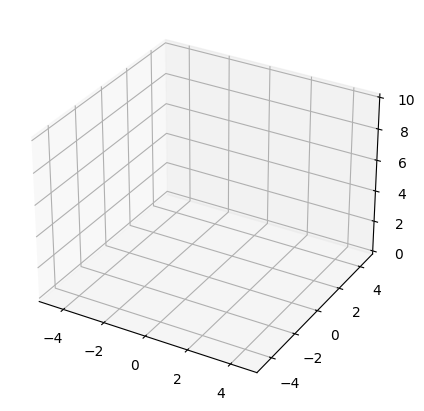

In [52]:
fig = plt.figure(figsize=(5,6))
ax = fig.add_subplot(111, projection='3d')

X,Y = np.meshgrid(x,y)

def init():


    ax.set_xlim3d(-5,5)
    ax.set_ylim3d(-5,5)
    ax.set_zlim3d(0,10)

def Update(i):

    ax.clear()
    init()

    ax.plot_surface(X,Y,U[i,:,:],cmap='viridis')

Animation = animation.FuncAnimation(fig,Update,frames=len(t),init_func=init)

In [53]:
HTML(Animation.to_html5_video())